<a href="https://colab.research.google.com/github/Quant-Projects/Recession-Prediction/blob/master/Recession_Model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
recession = pd.read_csv("JHDUSRGDPBR.csv", parse_dates=['DATE'])
vix = pd.read_csv("^VIX.csv", parse_dates=['Date'])[1:]
yield_curve = pd.read_excel("ust_daily.xlsx", parse_dates=['date'])

recession['Date'] = recession['DATE']
recession.drop(['DATE'], axis=1, inplace=True)

In [0]:
recession.set_index("Date", drop=True, inplace=True)
vix.set_index("Date", drop=True, inplace=True)
yield_curve.set_index("date", drop=True, inplace=True)

In [0]:
recession['Adj Close'] = recession['JHDUSRGDPBR']
recession.drop(['JHDUSRGDPBR'], axis=1, inplace=True)

In [0]:
vix['Rolling Avg'] = vix['Adj Close'].rolling(100).mean()
vix['Delta'] = vix['Adj Close'] - vix['Adj Close'].shift(63)
vix['Greater'] = vix['Adj Close'] > vix['Adj Close'].shift(round(252/12))

In [0]:
vix['Greater'].replace(True, 1, inplace=True)
vix['Greater'].replace(False, 0, inplace=True)

In [0]:
yield_curve['Delta'] = yield_curve['BC_6MONTH'] - yield_curve['BC_6MONTH'].shift(round(252/12))
yield_curve['Neg'] = yield_curve['BC_6MONTH'] > yield_curve['BC_6MONTH'].shift(round(252/12))

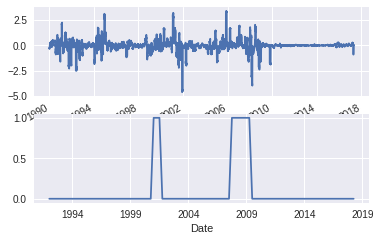

In [374]:
plt.subplot(211)
yield_curve['Delta'].plot()
plt.subplot(212)
recession['Adj Close'].plot()

In [375]:
yield_curve

,BC_1MONTH,BC_3MONTH,BC_6MONTH,BC_1YEAR,BC_2YEAR,BC_3YEAR,BC_5YEAR,BC_7YEAR,BC_10YEAR,BC_20YEAR,BC_30YEAR,BC_30YEARDISPLAY,Delta,Neg
date,,,,,,,,,,,,,,
1990-06-08,0.00,7.96,8.03,8.07,8.33,8.38,8.42,8.51,8.46,0.00,8.44,0.00,NaN,False
1990-06-07,0.00,7.96,8.01,8.07,8.34,8.38,8.41,8.49,8.46,0.00,8.43,0.00,NaN,False
1990-06-11,0.00,7.99,8.07,8.09,8.36,8.41,8.43,8.52,8.48,0.00,8.45,0.00,NaN,False
1990-06-13,0.00,7.93,7.99,8.02,8.27,8.32,8.35,8.44,8.40,0.00,8.39,0.00,NaN,False
1990-06-12,0.00,7.99,8.05,8.09,8.36,8.42,8.44,8.52,8.48,0.00,8.45,0.00,NaN,False
1990-06-01,0.00,7.94,8.01,8.06,8.33,8.36,8.38,8.47,8.44,0.00,8.43,0.00,NaN,False
1990-05-31,0.00,8.01,8.12,8.22,8.50,8.53,8.56,8.64,8.60,0.00,8.58,0.00,NaN,False
1990-06-04,0.00,7.96,8.03,8.07,8.31,8.36,8.39,8.47,8.44,0.00,8.43,0.00,NaN,False
1990-06-06,0.00,7.96,8.02,8.09,8.34,8.40,8.43,8.51,8.46,0.00,8.44,0.00,NaN,False


In [0]:
features = pd.DataFrame()

In [0]:
features['1'] = vix['Greater']
features['2'] = yield_curve['Neg']
features.index = vix.index

In [0]:
y = recession['Adj Close']
y.index = recession.index

In [379]:
features.shape, y.shape

((6612, 2), (106,))

In [0]:
data = pd.concat([features, y])

In [0]:
data.columns = ['Feat1', 'Feat2', 'Y']

In [0]:
data['Y'].fillna(method='backfill', inplace=True)

In [0]:
data['Feat2'] = pd.get_dummies(data['Feat2'])

In [384]:
data['Y'].value_counts()

0.0    6708
1.0      10
Name: Y, dtype: int64

In [385]:
data['Feat1'].isnull().sum() / len(data)

0.015778505507591543

In [0]:
data['Feat1'].fillna(value=-1, inplace=True)

In [387]:
data['Y'].value_counts()

0.0    6708
1.0      10
Name: Y, dtype: int64

In [388]:
!pip install imblearn

from imblearn.over_sampling import RandomOverSampler

In [389]:
X = data.drop(['Y'], axis=1).shift(round(252/12)).dropna()
y = data['Y'][round(252/12):]

X.shape, y.shape

((6697, 2), (6697,))

In [0]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [0]:
roc = RandomOverSampler()
X, y = roc.fit_resample(X, y)

In [0]:
trainX, testX, trainY, testY = train_test_split(X, y, test_size=.2)

In [393]:
rf = RandomForestClassifier()

kfold = KFold(n_splits=10, shuffle=True)
score = cross_val_score(rf, trainX, trainY, cv=kfold)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

In [394]:
score.mean()

0.9941118872559734

In [395]:
rf.fit(trainX, trainY)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [396]:
confusion_matrix(testY, rf.predict(testX))

array([[1363,   12],
       [   0, 1300]])